# Avacado Project

In [2]:
# import important libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Avacado.csv')

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [9]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [11]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
df.shape

(16468, 13)

In [13]:
df.size

214084

In [14]:
# summary of statstics
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [15]:
# Exploring the data variable
df.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58,  nan])

In [16]:
df.AveragePrice.value_counts()

1.08    46
0.99    44
1.03    44
1.09    43
1.10    43
        ..
1.49     1
0.49     1
1.53     1
1.54     1
1.61     1
Name: AveragePrice, Length: 113, dtype: int64

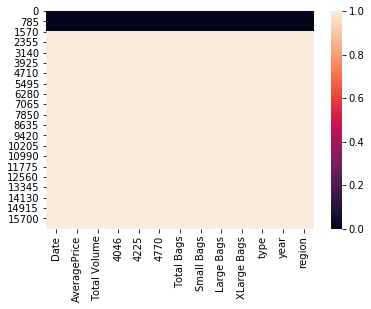

In [17]:
# Data Visualization to cheak the missing values
sns.heatmap(df.isnull())

In [18]:
# To check the correlation
dfcor=df.corr()
dfcor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


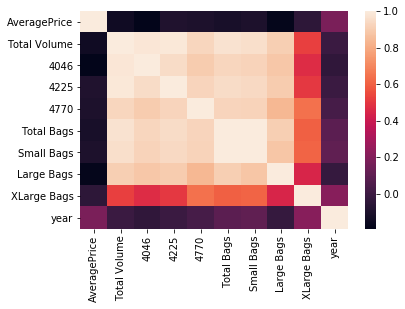

In [19]:
sns.heatmap(dfcor)

In [20]:
df.shape

(16468, 13)

In [22]:
df['AveragePrice'].mean()

1.0749901120632825

In [24]:
# What is the minimum Price of Avocado
df['AveragePrice'].min()

0.49

In [25]:
# What is the maximum Price of Avocado
df['AveragePrice'].max()

1.68

In [26]:
#Find maximum no of Avacados are sold
df['Total Volume'].max()

44655461.51

In [27]:
#How many people made the purchase
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [28]:
#Is there a correlation between Total bags and Total volume
df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.967689
Total Bags,0.967689,1.000000


In [29]:
#'What was the average volume of Avocado per year? (2015-2016) ?')
df.groupby('year')['Total Volume'].mean()

year
2015.0    1.610065e+06
2016.0    1.559787e+06
Name: Total Volume, dtype: float64

In [30]:
#Find Avg Price of Avocado in the different region in last 2 years
df.groupby('region')['AveragePrice'].mean()

region
Albany                 1.238657
Atlanta                1.012037
BaltimoreWashington    1.160923
Boise                  0.974923
Boston                 1.205484
BuffaloRochester       1.301569
California             1.055921
Charlotte              1.311613
Chicago                1.214783
Columbus               1.012553
DallasFtWorth          0.755882
Denver                 1.080833
Detroit                1.041250
GrandRapids            1.136957
GreatLakes             1.107222
HarrisburgScranton     1.157368
HartfordSpringfield    1.209231
Houston                0.780690
Indianapolis           1.126250
Jacksonville           1.113659
LasVegas               1.041000
LosAngeles             0.863333
Louisville             1.042941
MiamiFtLauderdale      1.176471
Midsouth               1.081111
Nashville              1.028400
NewYork                1.248636
Northeast              1.236667
NorthernNewEngland     1.111034
Orlando                1.133333
Philadelphia           1.293846
P

In [31]:
df[df['AveragePrice'] > df['AveragePrice'].mean()][['AveragePrice','year','region','4046','4225','4770']]

,AveragePrice,year,region,4046,4225,4770
0,1.33,2015.0,Albany,1036.74,54454.85,48.16
1,1.35,2015.0,Albany,674.28,44638.81,58.33
3,1.08,2015.0,Albany,1132.00,71976.41,72.58
4,1.28,2015.0,Albany,941.48,43838.39,75.78
5,1.26,2015.0,Albany,1184.27,48067.99,43.61
...,...,...,...,...,...,...
1512,1.39,2016.0,Charlotte,57529.11,56366.66,17531.78
1513,1.51,2016.0,Charlotte,43325.87,52189.61,19419.57
1514,1.48,2016.0,Charlotte,46364.75,52893.38,16736.92
1515,1.47,2016.0,Charlotte,54110.79,53593.58,17495.42


In [32]:
conventional = df[df['type'] == 'conventional']
conventional

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [33]:
#Find sales by regions
df.groupby('region')['Total Volume'].mean().sort_values()

region
Syracuse               4.857841e+04
Albany                 7.629020e+04
Spokane                7.718453e+04
Louisville             7.764284e+04
Boise                  8.104617e+04
Pittsburgh             8.143082e+04
Roanoke                1.308864e+05
BuffaloRochester       1.321844e+05
Jacksonville           1.380222e+05
Columbus               1.457604e+05
Indianapolis           1.575043e+05
Nashville              1.674714e+05
Charlotte              1.762781e+05
GrandRapids            1.908866e+05
StLouis                1.944995e+05
RichmondNorfolk        1.967580e+05
HarrisburgScranton     2.183198e+05
RaleighGreensboro      2.405372e+05
HartfordSpringfield    2.685772e+05
LasVegas               2.790102e+05
Orlando                3.013391e+05
Tampa                  3.279430e+05
SouthCarolina          3.337852e+05
Detroit                3.390654e+05
Philadelphia           3.849221e+05
NorthernNewEngland     3.959559e+05
Atlanta                4.676372e+05
MiamiFtLauderdale    

In [34]:
#Find the total no of sales in each year
df.groupby('year')['Total Volume'].count()

year
2015.0    1270
2016.0     247
Name: Total Volume, dtype: int64

In [35]:
# correlation
df[['4046','4770','4225','Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,4046,4770,4225,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
4046,1.000000,0.898570,0.951952,0.922278,0.884229,0.474063,0.985568,0.930395
4770,0.898570,1.000000,0.927757,0.923607,0.840523,0.646053,0.934347,0.926405
4225,0.951952,0.927757,1.000000,0.943988,0.900496,0.504718,0.987154,0.951779
Small Bags,0.922278,0.923607,0.943988,1.000000,0.879131,0.611300,0.960642,0.997341
Large Bags,0.884229,0.840523,0.900496,0.879131,1.000000,0.447779,0.910226,0.911336
XLarge Bags,0.474063,0.646053,0.504718,0.611300,0.447779,1.000000,0.521717,0.601856
Total Volume,0.985568,0.934347,0.987154,0.960642,0.910226,0.521717,1.000000,0.967689
Total Bags,0.930395,0.926405,0.951779,0.997341,0.911336,0.601856,0.967689,1.000000


In [36]:
df['Month'] = df['Date'].apply(lambda date:pd.Period(date, freq='M'))

In [37]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,2015-12
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,2015-12
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,2015-12
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,2015-06
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,2015-11
5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany,2015-11
6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany,2015-11
7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany,2015-08
8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany,2015-01
9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany,2015-10


In [38]:
avg_monthly_sales = df.groupby(df['Month'])['Total Volume'].mean()
avg_monthly_sales

Month
2015-01    1.984611e+06
2015-02    1.530926e+06
2015-03    1.867653e+06
2015-04    1.857106e+06
2015-05    2.025253e+06
2015-06    1.804561e+06
2015-07    1.756250e+06
2015-08    1.378348e+06
2015-09    1.070826e+06
2015-10    1.532913e+06
2015-11    1.096834e+06
2015-12    1.163282e+06
2016-01    1.580008e+06
2016-02    1.473113e+06
2016-03    1.598049e+06
2016-04    1.489546e+06
2016-05    1.868668e+06
2016-06    1.594725e+06
2016-07    2.217648e+06
2016-08    1.918387e+06
2016-09    1.500425e+06
2016-10    1.420263e+06
2016-11    1.044938e+06
2016-12    1.268990e+06
Freq: M, Name: Total Volume, dtype: float64

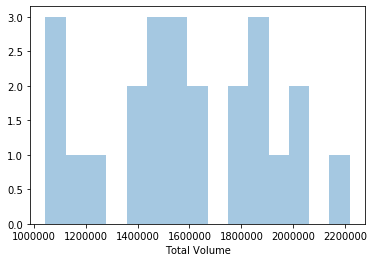

In [39]:
sns.distplot(avg_monthly_sales,bins=15, kde=False)

In [40]:
#Average Sales of Avacados by Quater of each year
df['Quater'] = df['Date'].apply(lambda date:pd.Period(date, freq='Q'))

In [42]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Quater
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,2015-12,2015Q4
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,2015-12,2015Q4
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,2015-12,2015Q4
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,2015-06,2015Q2
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,2015-11,2015Q4


In [44]:
avg_Q_sales = df.groupby(df['Quater'])['Total Volume'].mean()
avg_Q_sales

Quater
2015Q1    1.829428e+06
2015Q2    1.906081e+06
2015Q3    1.384532e+06
2015Q4    1.229398e+06
2016Q1    1.556661e+06
2016Q2    1.643336e+06
2016Q3    1.926284e+06
2016Q4    1.241163e+06
Freq: Q-DEC, Name: Total Volume, dtype: float64

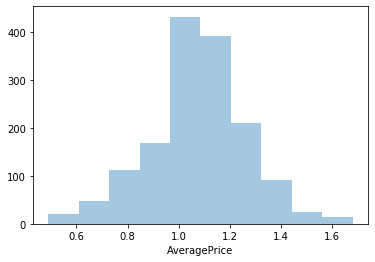

In [45]:
sns.distplot(df['AveragePrice'],bins=10, kde=False)

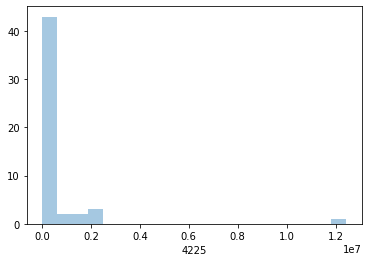

In [46]:
#Average sales of PLU 4225 by region.
sns.distplot(df.groupby('region')['4225'].mean(),bins=20, kde=False)

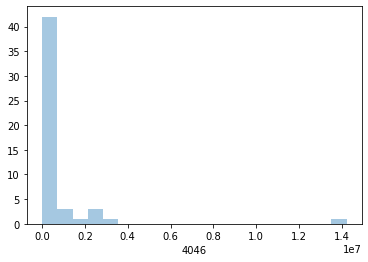

In [52]:
sns.distplot(df.groupby('region')['4046'].mean(),bins=20, kde=False)

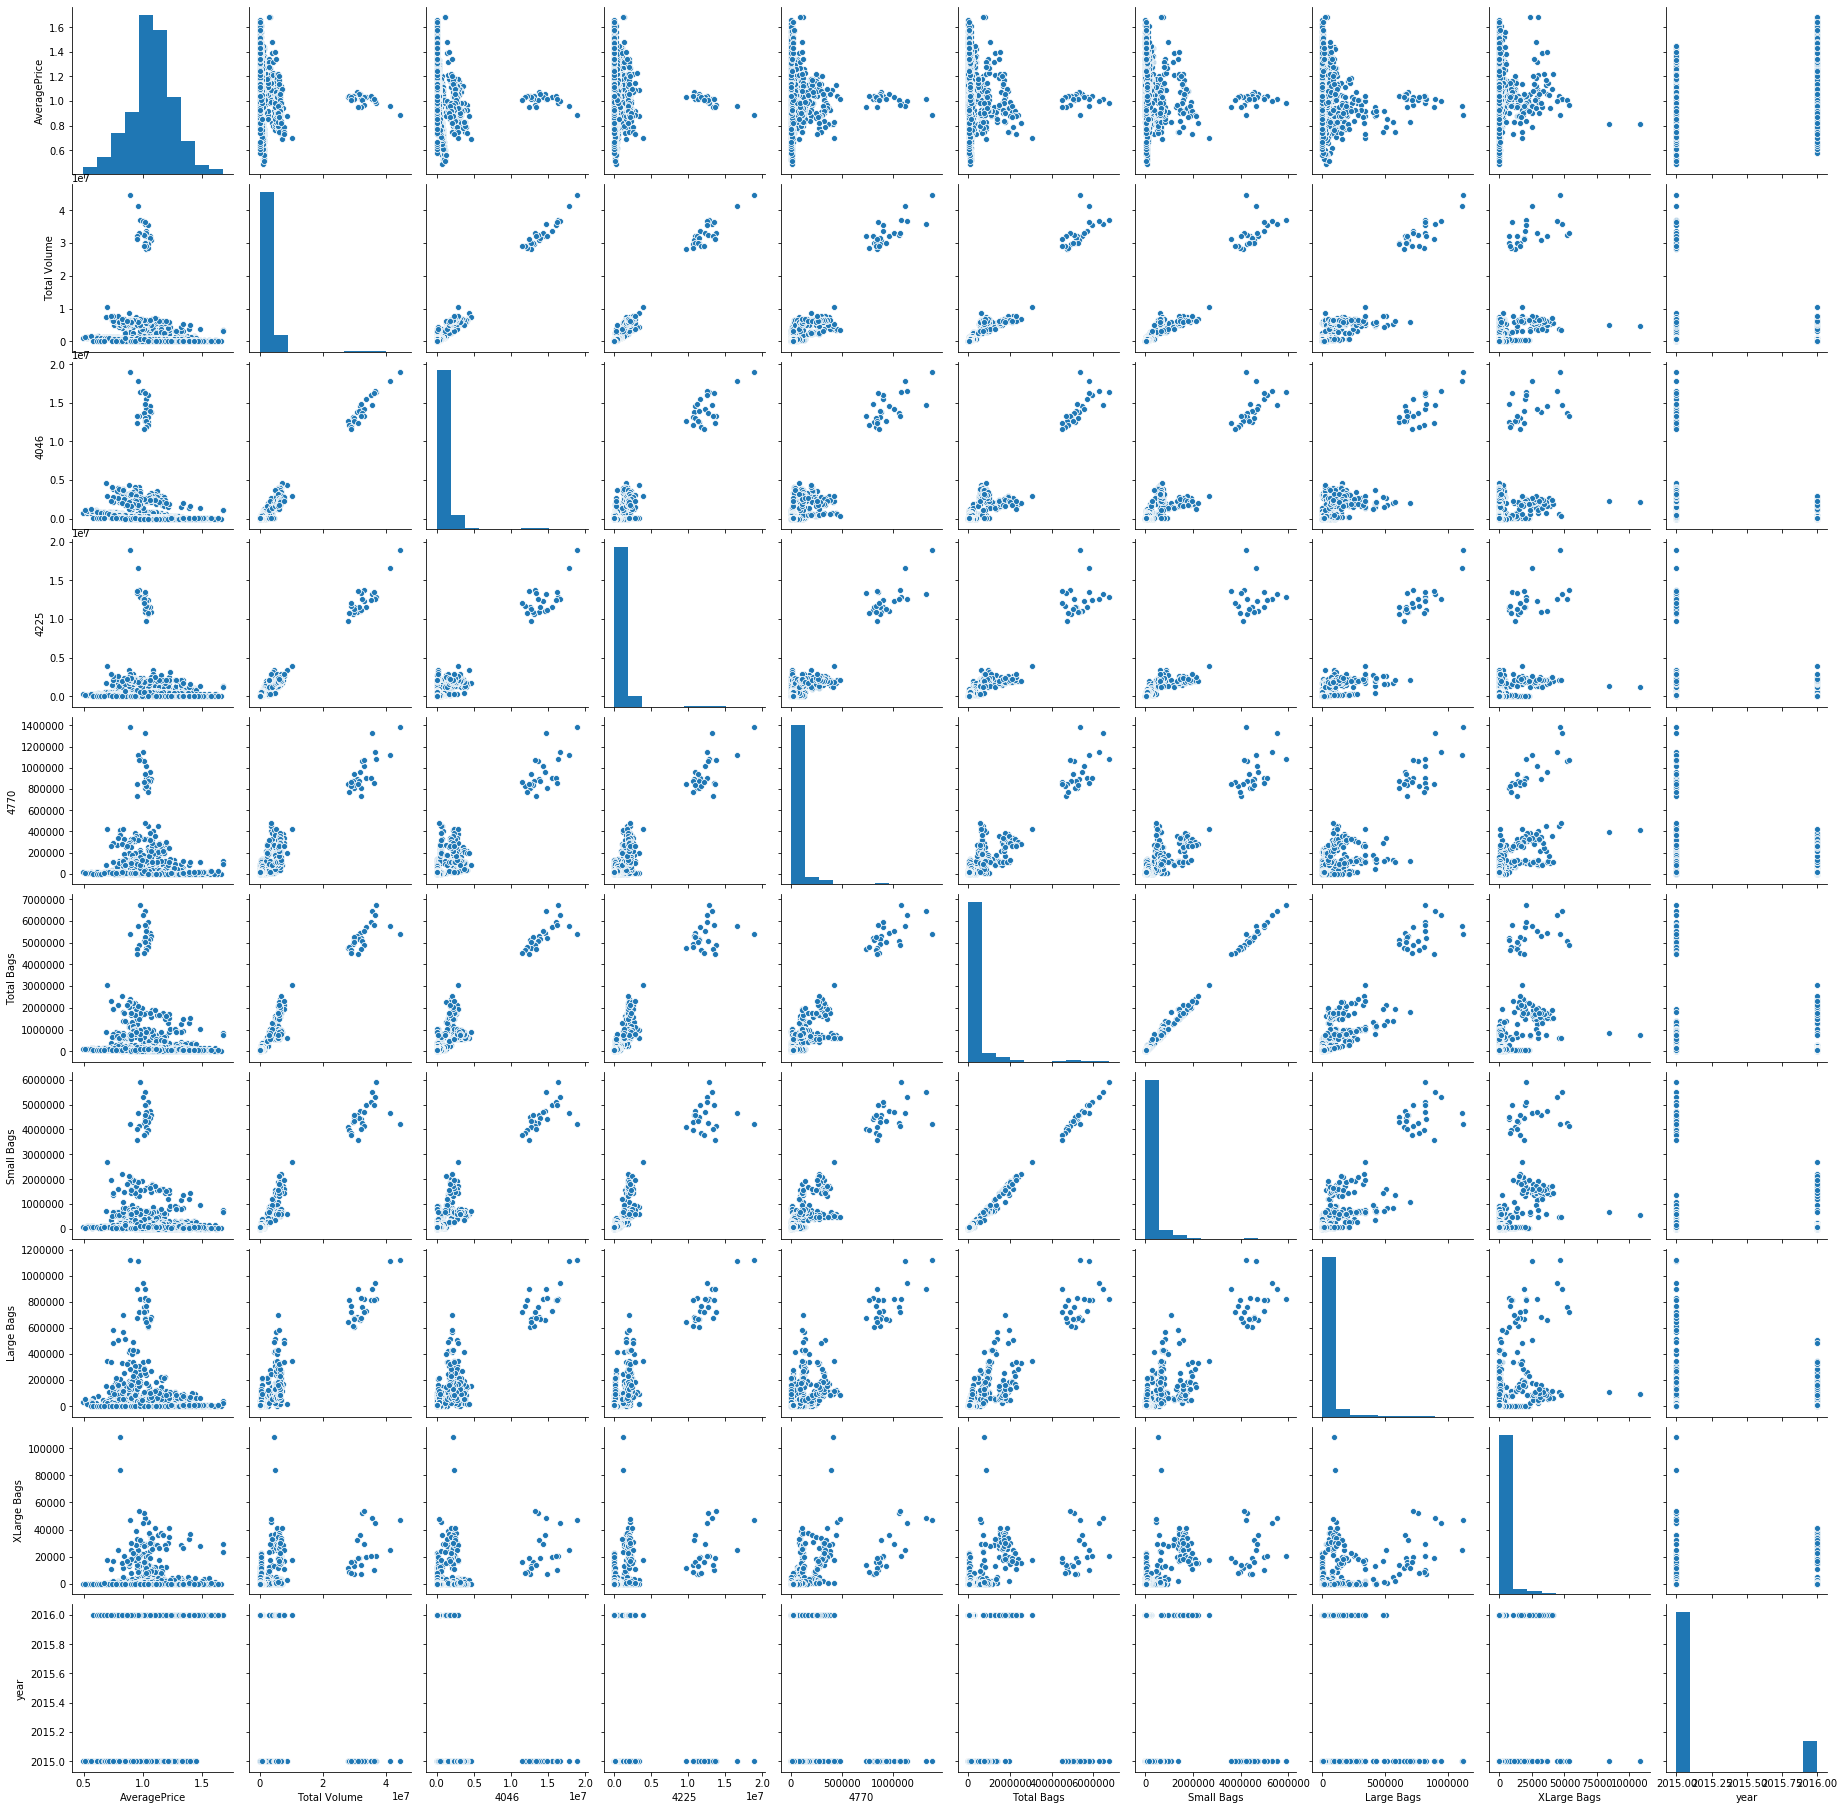

In [53]:
sns.pairplot(df)

In [54]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Quater
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,2015-12,2015Q4
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,2015-12,2015Q4
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,2015-12,2015Q4
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,2015-06,2015Q2
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,2015-11,2015Q4


In [55]:
y=df.drop(['Date','Quater','Month', 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year','region'], axis = 1)
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
16463,NaN
16464,NaN
16465,NaN
16466,NaN


In [56]:
x=df.drop(['AveragePrice'], axis = 1)
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Quater
0,27-12-2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,2015-12,2015Q4
1,20-12-2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,2015-12,2015Q4
2,13-12-2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,2015-12,2015Q4
3,06-12-2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,2015-06,2015Q2
4,29-11-2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,2015-11,2015Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=40)

In [58]:
x_train.shape

(12845, 14)

In [59]:
y_train.shape

(12845, 1)

In [60]:
x_test.shape

(3623, 14)

In [61]:
y_test.shape

(3623, 1)

In [62]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [63]:
from sklearn.externals import joblib
joblib.dump(df,'rf_regressor.pkl')

['rf_regressor.pkl']